# Load the binary classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiAk1hMsXrOoqBhHsvpy_AKs0RDUf5xMj3GW0H4EnllBOmS-TRfCaI
Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.6

     |████████████████████████████████| 458.3 MB 10 kB/s 
  Using cached h5py-3.1.0-cp37-cp37m-manylinux1_x86_64.whl (4.0 MB)
     |████████████████████████████████| 14.8 MB 171 kB/s 
     |████████████████████████████████| 5.6 MB 39.2 MB/s 
     |████████████████████████████████| 462 kB 72.9 MB/s 
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Success

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Binary_Classifier/binary_classifier.h5')

with open('/content/drive/MyDrive/Binary_Classifier/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [ ]:
def binary_classifier_predict(questions):
  maxlen = 100
  seq= loaded_tokenizer.texts_to_sequences(questions)
  padded = pad_sequences(seq, maxlen=maxlen)
  predictions = model.predict(padded)

  result = []
  for e in predictions:
    result.append(e[0])

  THRESHOLD = 0.5
  tapas_questions = []
  tabfact_questions = []
  for i in range(len(result)):
      # print("Question = ", questions[i])

      # Class 0
      if result[i] < THRESHOLD:
          # print("Class 0: Tabfact")
          tabfact_questions.append(questions[i])

      else:
          # print("Class 1: Tapas")
          tapas_questions.append(questions[i])

  return tapas_questions, tabfact_questions

In [ ]:
binary_classifier_predict(
    ['How many different coloured dotlines are there ?' ,
'Is the number of dotlines equal to the number of legend labels ?' ,
'What is the number of tourist arrivals in 1997 ?' ,
'Across all years, what is the maximum number of tourist arrivals ?' ,
'Across all years, what is the minimum number of tourist departures ?' ,
'In which year was the number of tourist arrivals maximum?' ,
'In which year was the number of tourist departures minimum?' ,
'What is the total number of tourist departures in the graph ?']
) # returns tapas_questions and tabfact_questions

(['How many different coloured dotlines are there ?',
  'What is the number of tourist arrivals in 1997 ?',
  'Across all years, what is the maximum number of tourist arrivals ?',
  'Across all years, what is the minimum number of tourist departures ?',
  'In which year was the number of tourist arrivals maximum?',
  'In which year was the number of tourist departures minimum?',
  'What is the total number of tourist departures in the graph ?'],
 ['Is the number of dotlines equal to the number of legend labels ?'])

# Download TAPAS

In [ ]:
! pip install tapas-table-parsing

  Using cached tensorflow-2.2.3-cp37-cp37m-manylinux2010_x86_64.whl (516.4 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h

In [ ]:
! gsutil cp "gs://tapas_models/2020_10_07/tapas_wtq_wikisql_sqa_inter_masklm_large_reset.zip" "tapas_model.zip" && unzip tapas_model.zip
! mv tapas_wtq_wikisql_sqa_inter_masklm_large_reset tapas_model

Copying gs://tapas_models/2020_10_07/tapas_wtq_wikisql_sqa_inter_masklm_large_reset.zip...
- [1 files][  3.4 GiB/  3.4 GiB]   16.6 MiB/s                                   
Operation completed over 1 objects/3.4 GiB.                                      
Archive:  tapas_model.zip
   creating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/bert_config.json  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/README.txt  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.index  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.data-00000-of-00001  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/vocab.txt  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.meta  


# Download TABFACT

In [ ]:
! gsutil cp "gs://tapas_models/2020_10_07/tapas_tabfact_inter_masklm_large_reset.zip" "tabfact_model.zip" && unzip tabfact_model.zip
! mv tapas_tabfact_inter_masklm_large_reset tabfact_model

Copying gs://tapas_models/2020_10_07/tapas_tabfact_inter_masklm_large_reset.zip...
- [1 files][  3.4 GiB/  3.4 GiB]   53.8 MiB/s                                   
Operation completed over 1 objects/3.4 GiB.                                      
Archive:  tabfact_model.zip
   creating: tapas_tabfact_inter_masklm_large_reset/
  inflating: tapas_tabfact_inter_masklm_large_reset/bert_config.json  
  inflating: tapas_tabfact_inter_masklm_large_reset/README.txt  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.index  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.data-00000-of-00001  
  inflating: tapas_tabfact_inter_masklm_large_reset/vocab.txt  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.meta  


# Download Test Images and Annotations

In [ ]:
!mkdir "plotqa"

In [ ]:
# Images

# https://drive.google.com/file/d/1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC/view?usp=sharing
!gdown -O "TEST.tar.gz" --id 1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC

!tar -xvf  '/content/TEST.tar.gz' -C '/content/plotqa/'

!rm TEST.tar.gz

Streaming output truncated to the last 5000 lines.
TEST/png/9525.png
TEST/png/27535.png
TEST/png/2324.png
TEST/png/24199.png
TEST/png/5976.png
TEST/png/21791.png
TEST/png/28934.png
TEST/png/17043.png
TEST/png/4326.png
TEST/png/21901.png
TEST/png/18113.png
TEST/png/27814.png
TEST/png/20542.png
TEST/png/10557.png
TEST/png/14240.png
TEST/png/9661.png
TEST/png/22899.png
TEST/png/20728.png
TEST/png/16651.png
TEST/png/6325.png
TEST/png/24477.png
TEST/png/30715.png
TEST/png/23348.png
TEST/png/14643.png
TEST/png/17510.png
TEST/png/3392.png
TEST/png/23341.png
TEST/png/1946.png
TEST/png/32301.png
TEST/png/10984.png
TEST/png/2385.png
TEST/png/30516.png
TEST/png/13308.png
TEST/png/17750.png
TEST/png/28523.png
TEST/png/8054.png
TEST/png/25213.png
TEST/png/28977.png
TEST/png/29057.png
TEST/png/12706.png
TEST/png/12463.png
TEST/png/791.png
TEST/png/5352.png
TEST/png/20372.png
TEST/png/1647.png
TEST/png/19889.png
TEST/png/7593.png
TEST/png/24825.png
TEST/png/29991.png
TEST/png/789.png
TEST/png/13106.p

In [ ]:
!mkdir "plotqa/TEST/csv"

In [ ]:
# CSVs

# https://drive.google.com/file/d/1hEelpWBw8q-Oa2fPad6gkO51CUQ6Cqrv/view
!gdown -O "FrRCNN_test_predicted_tables_0.5.tar.gz" --id 1hEelpWBw8q-Oa2fPad6gkO51CUQ6Cqrv

!tar -xvf  '/content/FrRCNN_test_predicted_tables_0.5.tar.gz' -C '/content/plotqa/TEST/csv'

!rm FrRCNN_test_predicted_tables_0.5.tar.gz

Streaming output truncated to the last 5000 lines.
FrRCNN_test_predicted_tables_0.5/18300.csv
FrRCNN_test_predicted_tables_0.5/12027.csv
FrRCNN_test_predicted_tables_0.5/22722.csv
FrRCNN_test_predicted_tables_0.5/19837.csv
FrRCNN_test_predicted_tables_0.5/1851.csv
FrRCNN_test_predicted_tables_0.5/16218.csv
FrRCNN_test_predicted_tables_0.5/26913.csv
FrRCNN_test_predicted_tables_0.5/30385.csv
FrRCNN_test_predicted_tables_0.5/25777.csv
FrRCNN_test_predicted_tables_0.5/29582.csv
FrRCNN_test_predicted_tables_0.5/22158.csv
FrRCNN_test_predicted_tables_0.5/32853.csv
FrRCNN_test_predicted_tables_0.5/29968.csv
FrRCNN_test_predicted_tables_0.5/2423.csv
FrRCNN_test_predicted_tables_0.5/32289.csv
FrRCNN_test_predicted_tables_0.5/5092.csv
FrRCNN_test_predicted_tables_0.5/26349.csv
FrRCNN_test_predicted_tables_0.5/1287.csv
FrRCNN_test_predicted_tables_0.5/10890.csv
FrRCNN_test_predicted_tables_0.5/903.csv
FrRCNN_test_predicted_tables_0.5/21007.csv
FrRCNN_test_predicted_tables_0.5/33425.csv
FrRCNN_te

# Load TABFACT

In [ ]:
import tensorflow.compat.v1 as tf
import os 
import shutil
import csv
import pandas as pd
import IPython

tf.get_logger().setLevel('ERROR')

from tapas.utils import tf_example_utils
from tapas.protos import interaction_pb2
from tapas.utils import number_annotation_utils
import math

In [ ]:
os.makedirs('results/tabfact/tf_examples', exist_ok=True)
os.makedirs('results/tabfact/model', exist_ok=True)
with open('results/tabfact/model/checkpoint', 'w') as f:
  f.write('model_checkpoint_path: "model.ckpt-0"')
for suffix in ['.data-00000-of-00001', '.index', '.meta']:
  shutil.copyfile(f'tabfact_model/model.ckpt{suffix}', f'results/tabfact/model/model.ckpt-0{suffix}')

In [ ]:
max_seq_length = 512
tabfact_vocab_file = "tabfact_model/vocab.txt"
tabfact_config = tf_example_utils.ClassifierConversionConfig(
    vocab_file=tabfact_vocab_file,
    max_seq_length=max_seq_length,
    max_column_id=max_seq_length,
    max_row_id=max_seq_length,
    strip_column_names=False,
    add_aggregation_candidates=False,
)
tabfact_converter = tf_example_utils.ToClassifierTensorflowExample(tabfact_config)

def tabfact_convert_interactions_to_examples(tables_and_queries):
  """Calls Tapas converter to convert interaction to example."""
  for idx, (table, queries) in enumerate(tables_and_queries):
    interaction = interaction_pb2.Interaction()
    for position, query in enumerate(queries):
      question = interaction.questions.add()
      question.original_text = query
      question.id = f"{idx}-0_{position}"
    for header in table[0]:
      interaction.table.columns.add().text = header
    for line in table[1:]:
      row = interaction.table.rows.add()
      for cell in line:
        row.cells.add().text = cell
    number_annotation_utils.add_numeric_values(interaction)
    for i in range(len(interaction.questions)):
      try:
        yield tabfact_converter.convert(interaction, i)
      except ValueError as e:
        print(f"Can't convert interaction: {interaction.id} error: {e}")
        
def tabfact_write_tf_example(filename, examples):
  with tf.io.TFRecordWriter(filename) as writer:
    for example in examples:
      writer.write(example.SerializeToString())

def tabfact_predict_new(table_data, queries):
  table = table_data
  examples = tabfact_convert_interactions_to_examples([(table, queries)])
  tabfact_write_tf_example("results/tabfact/tf_examples/test.tfrecord", examples)
  tabfact_write_tf_example("results/tabfact/tf_examples/dev.tfrecord", [])
  
  ! python -m tapas.run_task_main \
    --task="TABFACT" \
    --output_dir="results" \
    --noloop_predict \
    --test_batch_size={len(queries)} \
    --tapas_verbosity="ERROR" \
    --compression_type= \
    --reset_position_index_per_cell \
    --init_checkpoint="tabfact_model/model.ckpt" \
    --bert_config_file="tabfact_model/bert_config.json" \
    --mode="predict" 2> error


  results_path = "results/tabfact/model/test.tsv"
  all_results = []
  df = pd.DataFrame(table[1:], columns=table[0])
  # display(IPython.display.HTML(df.to_html(index=False)))
  print()
  with open(results_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    for row in reader:
      supported = int(row["pred_cls"])
      all_results.append(supported)
      score = float(row["logits_cls"])
      position = int(row['position'])
      print(queries[position])
      if supported:
        print("> YES")
      else:
        print("> NO")
  print()
  return all_results

# Load TAPAS

In [ ]:
import tensorflow.compat.v1 as tf
import os 
import shutil
import csv
import pandas as pd
import numpy as np
import IPython

tf.get_logger().setLevel('ERROR')

from tapas.utils import tf_example_utils
from tapas.protos import interaction_pb2
from tapas.utils import number_annotation_utils
from tapas.scripts import prediction_utils

In [ ]:
os.makedirs('results/wtq/tf_examples', exist_ok=True)
os.makedirs('results/wtq/model', exist_ok=True)
with open('results/wtq/model/checkpoint', 'w') as f:
  f.write('model_checkpoint_path: "model.ckpt-0"')
for suffix in ['.data-00000-of-00001', '.index', '.meta']:
  shutil.copyfile(f'tapas_model/model.ckpt{suffix}', f'results/wtq/model/model.ckpt-0{suffix}')

In [ ]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [ ]:
def Average(Values) :  
  res_avg = sum(float(x) for x in Values if x != 'nan') / len(Values)
  return str(res_avg)
  # res_average = np.mean(Values)
  # return str(res_average)

def Count(Values) :
  return str(len(Values))

def Sum(Values):
  if isfloat(Values[0]):
    return str(sum(float(x) for x in Values if x != 'nan'))
  else:
    return str("")
  # return str(np.sum(Values))

def Max(Values):
  pass

def Min(Values):
  pass

In [ ]:
def predict_new(table_data, queries, display = False):

  table = table_data
  examples = convert_interactions_to_examples([(table, queries)])
  write_tf_example("results/wtq/tf_examples/test.tfrecord", examples)
  write_tf_example("results/wtq/tf_examples/random-split-1-dev.tfrecord", [])
  
  ! python -m tapas.run_task_main \
    --task="WTQ" \
    --output_dir="results" \
    --noloop_predict \
    --test_batch_size={len(queries)} \
    --tapas_verbosity="ERROR" \
    --compression_type= \
    --reset_position_index_per_cell \
    --init_checkpoint="tapas_model/model.ckpt" \
    --bert_config_file="tapas_model/bert_config.json" \
    --mode="predict" 2> error

  ANSWERS = []
  results_path = "results/wtq/model/test.tsv"
  all_coordinates = []
  df = pd.DataFrame(table[1:], columns=table[0])
  print("\n\n\n")
  # display(IPython.display.HTML(df.to_html(index=False)))
  Method_mapper = {'AVERAGE' : Average , 'SUM' : Sum , 'COUNT' : Count , 'MAX' : Max , 'MIN' : Min}
  print()
  with open(results_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    query_index = 0

    for row in reader:
      coordinates = sorted(prediction_utils.parse_coordinates(row["answer_coordinates"]))
      all_coordinates.append(coordinates)
      answers = ', '.join([table[row + 1][col] for row, col in coordinates])
      position = int(row['position'])
      aggregation = aggregation_to_string(int(row["pred_aggr"]))

      if display:
        print(">", queries[position])
      answer_text = str(answers)
      #print(aggregation ,  type(aggregation)  , answers , type(answers) , answer_text , type(answer_text) , sep = "\n")
      # print(aggregation, answer_text)

      if re.search("list", queries[position]):
          answer_text += "\n"
          ANSWERS.append(answer_text)

      elif aggregation != "NONE":
        num_results = answer_text.split(",")
        num_results = [num.strip() for num in num_results]

        num_results = [float(x) if x.isnumeric() else x for x in num_results]
        
        #print("NUMS : " , num_results)

        answer_text = f"{aggregation} of {answer_text}"

        actual_answer = Method_mapper[aggregation](num_results)

        answer_text = answer_text + "\n" + actual_answer + "\n"
        ANSWERS.append(actual_answer)
    
      else:
          answer_text += "\n"
          ANSWERS.append(answer_text)
    
      if display:
        print(answer_text)

        # print("EXPECTED = ", plotqa_data[queries[position]])
        # print("PREDICTED = ", answer_text)

        print("\n")

  return ANSWERS

In [ ]:
max_seq_length = 512
vocab_file = "tapas_model/vocab.txt"
config = tf_example_utils.ClassifierConversionConfig(
    vocab_file=vocab_file,
    max_seq_length=max_seq_length,
    max_column_id=max_seq_length,
    max_row_id=max_seq_length,
    strip_column_names=False,
    add_aggregation_candidates=False,
)
converter = tf_example_utils.ToClassifierTensorflowExample(config)


def convert_interactions_to_examples(tables_and_queries):
  """Calls Tapas converter to convert interaction to example."""
  for idx, (table, queries) in enumerate(tables_and_queries):
    interaction = interaction_pb2.Interaction()
    for position, query in enumerate(queries):
      question = interaction.questions.add()
      question.original_text = query
      question.id = f"{idx}-0_{position}"
    for header in table[0]:
      interaction.table.columns.add().text = header
    for line in table[1:]:
      row = interaction.table.rows.add()
      for cell in line:
        row.cells.add().text = cell
    number_annotation_utils.add_numeric_values(interaction)
    for i in range(len(interaction.questions)):
      try:
        yield converter.convert(interaction, i)
      except ValueError as e:
        print(f"Can't convert interaction: {interaction.id} error: {e}")
        
def write_tf_example(filename, examples):
  with tf.io.TFRecordWriter(filename) as writer:
    for example in examples:
      writer.write(example.SerializeToString())

def aggregation_to_string(index):
  if index == 0:
    return "NONE"
  if index == 1:
    return "SUM"
  if index == 2:
    return "AVERAGE"
  if index == 3:
    return "COUNT"
  raise ValueError(f"Unknown index: {index}")

# Load Images and Annotations

In [ ]:
from google.colab import files
import os
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import json
from natsort import natsorted 
import shutil
import pandas as pd
from statistics import median
from math import floor
from math import ceil

import numpy as np
import pickle
%matplotlib inline

In [ ]:
images = natsorted(glob.glob("/content/plotqa/TEST/png/*png"))
print(f"Number of Images in Testing set = {len(images)}")

Number of Images in Testing set = 33657


In [ ]:
with open('/content/plotqa/TEST/annotations.json') as f:
  annot = json.load(f)

print(type(annot))   # List of dict 
print(len(annot))
annot = sorted(annot, key=lambda k: k['image_index']) 

<class 'list'>
33657


In [ ]:
with open('/content/plotqa/TEST/qa_pairs.json') as fp:
    qa = json.load(fp)
print(len(qa["qa_pairs"]))
print(qa["qa_pairs"][0])

1228313
{'image_index': 0, 'qid': 'S7', 'question_string': 'How many different coloured dotlines are there ?', 'answer_bbox': [], 'template': 'structural', 'answer': 2, 'answer_id': 0, 'type': 'dot', 'question_id': 0}


In [ ]:
csvs = natsorted(glob.glob("/content/plotqa/TEST/csv/FrRCNN_test_predicted_tables_0.5/*csv"))
print(f"Number of Images in Testing set = {len(csvs)}")

Number of Images in Testing set = 32304


In [ ]:
plot_types = dict()
for item in annot:
  if item["type"] not in plot_types:
    plot_types[item["type"]] = [item["image_index"]]
  else:
    plot_types[item["type"]].append(item["image_index"])

In [ ]:
for k in plot_types:
    print(f"{k} = {len(plot_types[k])}")

dot_line = 5574
hbar_categorical = 11292
line = 5549
vbar_categorical = 11242


# Load Functions used in TAPAS

In [ ]:
def get_csvfile_path(ind):
  return "/content/plotqa/TEST/csv/FrRCNN_test_predicted_tables_0.5/"+str(annot[ind]["image_index"])+".csv"

In [ ]:
def get_list_of_list(ind, display = False):
    df = pd.read_csv(get_csvfile_path(ind))
    df = df.astype(str)
    df.drop(axis = 1 , labels = ['Unknown' , 'xlabel' , 'ylabel' ,'title' , 'legend orientation'] , inplace= True)
    df = df.sort_values(df.columns[0],ignore_index=True)
    if display:
        print(df)

    list_of_list_1 = [[]]
    list_of_list_1[0] = list(df.columns)
    list_of_list_1.extend(df.values.tolist()) 
    return list_of_list_1

In [ ]:
def display_image_qa_pairs(img_id):

  print("png/"+str(img_id)+".png")
  for i, path in enumerate(images):
    if re.search("png/"+str(img_id)+".png", path):
      break

  # Image
  print("\nImage:\n")
  print(images[i])
  img = mpimg.imread(images[i])
  imgplot = plt.imshow(img)
  plt.show()

  questions = list()
  answers = list()
  print("\nQA Pairs:\n")
  img_index = annot[i]["image_index"]
  count = 0

  for j in qa["qa_pairs"]:
    if j["image_index"] == img_index:
      count  += 1
 
      print(f"Q{count}: {j['question_string']}")
      print(f"Ans: {j['answer']}")
      questions.append(j['question_string'])
      answers.append(j['answer'])

  return i, questions, answers


# # global variable theirs
# def get_comparison(theirs, ours, questions, answers):
#   d = dict()
#   for ques, ans in theirs:
#     d[ques] = ans

#   for ques, ans in ours:
#     d[ques] = ans

#   for i in range(len(questions)):
#     print(questions[i])
#     print("EXPECTED: " + str(answers[i]))
#     print("GOT: " + str(d[questions[i]]))


In [ ]:
plot_types = dict()
for item in annot:
  if item["type"] not in plot_types:
    plot_types[item["type"]] = [item["image_index"]]
  else:
    plot_types[item["type"]].append(item["image_index"])

In [ ]:
def spilt_ratio(query):
    s1 = []
    s2 = []
    flag = False
    query = query.split()
    i = 0
    while i < len(query):
        if query[i] != "to":
            s1.append(query[i])
            i = i + 1
        elif i+1 < len(query):
            s2 = s1[:-1]
            s2.append(query[i+1])
            flag = True
            i = i + 2
        while flag and i < len(query):
            s1.append(query[i])
            s2.append(query[i])
            i += 1
    return " ".join(s1), " ".join(s2)

In [ ]:
def find_ratio(q, list_of_list):
    q = re.sub("ratio", "", q)
    q1, q2 = spilt_ratio(q)
    res = predict_new(list_of_list, [q1, q2])

    return str(float(res[0]) / float(res[1]))

In [ ]:
def find_trend(q, list_of_list):
    def is_increasing(vals):
        return all(i <= j for i, j in zip(vals, vals[1:]))

    def is_decreasing(vals):
        return all(i >= j for i, j in zip(vals, vals[1:]))


    query = "get the list of all values" + q[re.search("trend", q).end():]
    list_val = predict_new(list_of_list, [query]) 
    vals = list(map(lambda val: float(val), list_val[0].split(", ")))

    if is_increasing(vals):
        return "INCREASING"
    elif is_decreasing(vals):
        return "DECREASING"
    else:
        return "NONE"

In [ ]:
def find_median(q, list_of_list, columns):
    for col in columns:
        if re.search(col, q):
            query = "get the list of all values in " + col
            list_val = predict_new(list_of_list, [query])
            vals = list(map(lambda val: float(val), list_val[0].split(", ")))
            return median(vals)

In [ ]:
def find_difference(q, list_of_list, column):
    q = "".join(q.split("difference between")[-1]).strip()
    q1, name2 = q.split("and")
    for col in column:
        if re.search(col, q1):
            q2 = re.sub(col, "", q1).strip()
            q2 = q2 + " " + name2.strip()

    val1, val2 = predict_new(list_of_list, [q1, q2]) 
    
    return str(abs(float(val1) - float(val2)))

In [ ]:
def find_range(q, list_of_list):
  subquery = q.split("range")[-1].strip()
  q1 = "maximum " + subquery
  q2 = "minimum " + subquery
  maximum, minimum = predict_new(list_of_list, [q1, q2])
  return str(float(maximum) - float(minimum))

In [ ]:
def find_quartiles(q, list_of_list, columns):
  for col in columns:
    if re.search(col, q):
      query = "get the list of all values in " + col
      list_val = predict_new(list_of_list, [query])
      vals = list(map(lambda val: float(val), list_val[0].split(", ")))
      vals.sort()
      n = len(vals)

      q1 = (n + 1)/4
      q3 = 3*(n + 1)/4
      # print(n, q1, q3)
      if (n + 1) % 4:
        q1_left = floor(q1)
        q1_right = ceil(q1)
        q1_value = ( vals[q1_left-1] + vals[q1_right-1] ) / 2

      else:
        q1_value = vals[q1-1]


      if (3*(n + 1)) % 4:
        q3_left = floor(q3)
        q3_right = ceil(q3)
        q3_value = ( vals[q3_left-1] + vals[q3_right-1] ) / 2
      else:
        q3_value = vals[q3-1]

      q2_value = median(vals)

      return str(q1_value), str(q2_value), str(q3_value)

In [ ]:
def find_iqr(q1, q3):
  return str(float(q3) - float(q1))

In [ ]:
def tapas_find_answers(question, columns, list_of_list):

  
    unanswered = []
    for qes in question:
        if re.search("ratio", qes):
            ans = find_ratio(qes, list_of_list)
            print(">", qes)
            print("RATIO = ", ans)
            print("\n")

        elif re.search("median", qes):
            ans = find_median(qes, list_of_list, columns)
            print(">", qes)
            print("MEDIAN = ", ans)
            print("\n")

        elif re.search("trend", qes):
            ans = find_trend(qes, list_of_list)
            print(">", qes)
            print("TREND = ", ans)
            print("\n")

        elif re.search("difference", qes):
            ans = find_difference(qes, list_of_list, columns)
            print(">", qes)
            print("DIFFERENCE = ", ans)
            print("\n")

        elif re.search("interquartile range", qes):
            q1, _, q3 = find_quartiles(qes, list_of_list, columns)
            ans = find_iqr(q1, q3)
            print(">", qes)
            print("INTER-QUARTILE RANGE = ", ans)
            print("\n")

        elif re.search("quartiles", qes):
            q1, q2, q3 = find_quartiles(qes, list_of_list, columns)
            print(">", qes)
            print("FIRST QUARTILE (Q1) = ", q1)
            print("SECOND QUARTILE (Q2) = ", q2)
            print("THIRD QUARTILE (Q3) = ", q3)
            print("\n")

            
        elif re.search("range", qes):
            ans = find_range(qes, list_of_list)
            print(">", qes)
            print("RANGE = ", ans)
            print("\n")

        else:
            unanswered.append(qes)
    if unanswered:
        res = predict_new(list_of_list, unanswered, True) 

In [ ]:
def tapas_find_answers_TEST(question, columns, list_of_list, plotqa_data):

  
    unanswered = []
    for qes in question:

        try:


          if re.search("ratio", qes):
              ans = find_ratio(qes, list_of_list)
              print(">", qes)
              print("EXPECTED = ", plotqa_data[qes])
              print("PREDICTED = ", ans)
              print("\n")

          elif re.search("median", qes):
              ans = find_median(qes, list_of_list, columns)
              print(">", qes)
              print("EXPECTED = ", plotqa_data[qes])
              print("PREDICTED = ", ans)
              print("\n")

          elif re.search("trend", qes):
              ans = find_trend(qes, list_of_list)
              print(">", qes)
              print("EXPECTED = ", plotqa_data[qes])
              print("PREDICTED = ", ans)
              print("\n")

          elif re.search("difference", qes):
              ans = find_difference(qes, list_of_list, columns)
              print(">", qes)
              print("EXPECTED = ", plotqa_data[qes])
              print("PREDICTED = ", ans)
              print("\n")

          elif re.search("interquartile range", qes):
              q1, _, q3 = find_quartiles(qes, list_of_list, columns)
              ans = find_iqr(q1, q3)
              print(">", qes)
              print("INTER-QUARTILE RANGE = ", ans)
              print("\n")

          elif re.search("quartiles", qes):
              q1, q2, q3 = find_quartiles(qes, list_of_list, columns)
              print(">", qes)
              print("FIRST QUARTILE (Q1) = ", q1)
              print("SECOND QUARTILE (Q2) = ", q2)
              print("THIRD QUARTILE (Q3) = ", q3)
              print("\n")

              
          elif re.search("range", qes):
              ans = find_range(qes, list_of_list)
              print(">", qes)
              print("RANGE = ", ans)
              print("\n")

          else:
              unanswered.append(qes)


        except:
          print("CAN'T ANSWER : " + qes)

    try:
      if unanswered:
          res = predict_new(list_of_list, unanswered, True) 
    
    except:
      print("CAN'T ANSWER :")

# Load Functions used in TABFACT

In [ ]:
def part_answer(part, columns, list_of_list):
  if re.search("ratio", part):
      ans = find_ratio(part, list_of_list)
      print(">", part)
      print("RATIO = ", ans)
      print("\n")
      return ans

  elif re.search("median", part):
      ans = find_median(part, list_of_list, columns)
      print(">", part)
      print("MEDIAN = ", ans)
      print("\n")
      return ans

  elif re.search("trend", part):
      ans = find_trend(part, list_of_list)
      print(">", part)
      print("TREND = ", ans)
      print("\n")
      return ans

  elif re.search("difference", part):
      ans = find_difference(part, list_of_list, columns)
      print(">", part)
      print("DIFFERENCE = ", ans)
      print("\n")
      return ans

  else:
      return "NOT_FOUND"
          

def tabfact_find_answers(list_of_list, question, columns):
    unanswered = []
    pattern = re.compile(r'\bgreat\b|\bgreater\b|\bhigh\b|\bhigher\b|\blow\b|\blower\b|\bless\b|\blesser\b|\bsmall\b|\bsmaller\b|\bequal\b', flags=re.I | re.X)
    prelim = re.compile(r'\bratio\b|\bmedian\b|\bdifference\b', flags=re.I | re.X)
    for qes in question:
        if prelim.search(qes) != None:
          x = pattern.search(qes)
          if x != None:
            first_part = qes[0: x.span()[0]]
            second_part = qes[x.span()[1] : ] 

            # print("FIRST PART :", first_part)
            # print("SECOND PART:", second_part)

            first_ans = part_answer(first_part,  columns, list_of_list)
            second_ans = part_answer(second_part, columns, list_of_list) 

            if first_ans == "NOT_FOUND" or second_ans == "NOT_FOUND":
              unanswered.append(qes)
            else:
              # print(first_ans, second_ans)
              exact_match = x.group()
              fl_fans = round(float(first_ans), 2)
              fl_sans = round(float(second_ans), 2)
              print(qes)

              if exact_match == "equal":
                if fl_fans == fl_sans:
                  print("> YES")
                else:
                  print("> NO")

              elif exact_match == "great" or exact_match == "greater" or exact_match == "high" or exact_match == "higher":
                if fl_fans > fl_sans:
                  print("> YES")
                else:
                  print("> NO")

              else:
                if fl_fans < fl_sans:
                  print("> YES")
                else:
                  print("> NO")

          else:
            unanswered.append(qes) 
        else:
          unanswered.append(qes)


    if unanswered:
        res = tabfact_predict_new(list_of_list, unanswered) 

In [ ]:
def part_answer(part, columns, list_of_list):
  if re.search("ratio", part):
      ans = find_ratio(part, list_of_list)
      print(">", part)
      print("RATIO = ", ans)
      print("\n")
      return ans

  elif re.search("median", part):
      ans = find_median(part, list_of_list, columns)
      print(">", part)
      print("MEDIAN = ", ans)
      print("\n")
      return ans

  elif re.search("trend", part):
      ans = find_trend(part, list_of_list)
      print(">", part)
      print("TREND = ", ans)
      print("\n")
      return ans

  elif re.search("difference", part):
      ans = find_difference(part, list_of_list, columns)
      print(">", part)
      print("DIFFERENCE = ", ans)
      print("\n")
      return ans

  else:
      return "NOT_FOUND"
          

def tabfact_find_answers_TEST(list_of_list, question, columns):
    unanswered = []
    pattern = re.compile(r'\bgreat\b|\bgreater\b|\bhigh\b|\bhigher\b|\blow\b|\blower\b|\bless\b|\blesser\b|\bsmall\b|\bsmaller\b|\bequal\b', flags=re.I | re.X)
    prelim = re.compile(r'\bratio\b|\bmedian\b|\bdifference\b', flags=re.I | re.X)
    for qes in question:
        try:
          if prelim.search(qes) != None:
            x = pattern.search(qes)
            if x != None:
              first_part = qes[0: x.span()[0]]
              second_part = qes[x.span()[1] : ] 

              # print("FIRST PART :", first_part)
              # print("SECOND PART:", second_part)

              first_ans = part_answer(first_part,  columns, list_of_list)
              second_ans = part_answer(second_part, columns, list_of_list) 

              if first_ans == "NOT_FOUND" or second_ans == "NOT_FOUND":
                unanswered.append(qes)
              else:
                # print(first_ans, second_ans)
                exact_match = x.group()
                fl_fans = round(float(first_ans), 2)
                fl_sans = round(float(second_ans), 2)
                print(qes)

                if exact_match == "equal":
                  if fl_fans == fl_sans:
                    print("> YES")
                  else:
                    print("> NO")

                elif exact_match == "great" or exact_match == "greater" or exact_match == "high" or exact_match == "higher":
                  if fl_fans > fl_sans:
                    print("> YES")
                  else:
                    print("> NO")

                else:
                  if fl_fans < fl_sans:
                    print("> YES")
                  else:
                    print("> NO")

            else:
              unanswered.append(qes) 

          else:
            unanswered.append(qes)

        except:
          print("CAN'T ANSWER : " + qes)

    try:
      if unanswered:
          res = tabfact_predict_new(list_of_list, unanswered) 

    except:
      print("CAN'T ANSWER")

# Testing

## hbar_categorical

### Case 1

In [ ]:
IMAGE_ID = plot_types["hbar_categorical"][0]
print(IMAGE_ID)

5574


png/5574.png

Image:

/content/plotqa/TEST/png/5574.png


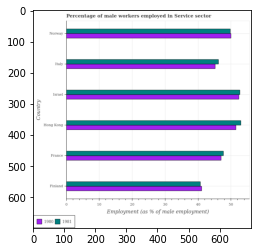


QA Pairs:

Q1: How many different coloured bars are there ?
Ans: 2
Q2: How many groups of bars are there ?
Ans: 6
Q3: Are the number of bars per tick equal to the number of legend labels ?
Ans: Yes
Q4: Are the number of bars on each tick of the Y-axis equal ?
Ans: Yes
Q5: How many bars are there on the 1st tick from the top ?
Ans: 2
Q6: How many bars are there on the 2nd tick from the bottom ?
Ans: 2
Q7: What is the label of the 2nd group of bars from the top ?
Ans: Italy
Q8: In how many cases, is the number of bars for a given country not equal to the number of legend labels ?
Ans: 0
Q9: What is the percentage of male workers employed in Service sector in 1981 in Israel ?
Ans: 52.7000007629395
Q10: Across all countries, what is the maximum percentage of male workers employed in Service sector in 1980 ?
Ans: 52.4000015258789
Q11: Across all countries, what is the minimum percentage of male workers employed in Service sector in 1980 ?
Ans: 41.0999984741211
Q12: In which country was the

In [ ]:
ind, plotqa_questions, plotqa_answers = display_image_qa_pairs(IMAGE_ID)

In [ ]:
plotqa_data = dict()

for q, a in zip(plotqa_questions, plotqa_answers):
  plotqa_data[q] = a

In [ ]:
df = pd.read_csv(get_csvfile_path(ind))
df.drop(axis = 1 , labels = ['Unknown' , 'xlabel' , 'ylabel' ,'title' , 'legend orientation'] , inplace= True)
columns = list(df.columns)

data = get_list_of_list(ind, True)

     Country                1980                1981
0    Finland   41.56915064054187   41.21788389031577
1     France      48.97010591234   48.40140328049439
2  Hong Kong  53.624025195560996   54.12660380966694
3     Israel  54.191569798758344    54.5127801772846
4      Italy  46.373520540205824   46.33205263996708
5     Norway   51.48881822230819  51.018932095367745


In [ ]:
questions =  [
            "what is the total number of country",
            "What is the difference between the average of 1980 and 1981",
            "What is the ratio of male workers in 1981 to 1980 for the country Hong Kong",
            "what are the names all the countries",
            'Across all countries, what is the maximum percentage of male workers employed in Service sector in 1980 ?',
            "which country has the minimum value in the year 1981?",
            "what is the total male workers employed in 1980",
            "what is the sum for countries France, Finland in the year 1980?",
            "what is the value for Country France in the year 1981?",
            "what is the average in year 1980?",
            "find the average in year 1981?",
            "what is the median of male workers in 1980",   
            "What is the trend for the country Finland, France, Hong Kong in 1980",
            "what is the maximum of % of male employment for the year 1980",
            "what is the minimum of % of male employment for the year 1980",
            "what is the range of % of male employment for the year 1980",
            "find the quartiles for the year 1980",
            "find the interquartile range for the year 1980",
              'In the year 1981, hong kong has the highest employment percentage.',
              'For the year 1980, Italy has a lower employment percentage than Norway.',
              'The average employment rate of hong kong is greater than the average employment rate of Finland.',
              'Is the percentage of male workers employed in Service sector in 1980 in Italy less than that in Norway ?',
              'Is the sum of the percentage of male workers employed in Service sector in 1981 in Finland and Israel greater than the maximum percentage of male workers employed in Service sector in 1980 across all countries ?'      
]

In [ ]:
tapas_questions, tabfact_questions = binary_classifier_predict(questions)

In [ ]:
# len(plotqa_questions), len(tapas_questions), len(tabfact_questions)

In [ ]:
# tapas_find_answers_TEST(tapas_questions, columns, data, plotqa_data)
tapas_find_answers(tapas_questions, columns, data)

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> What is the difference between the average of 1980 and 1981
DIFFERENCE =  0.10125573610311278


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> What is the ratio of male workers in 1981 to 1980 for the country Hong Kong
RATIO =  1.0093722657385955


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median of male workers in 1980
MEDIAN =  50.22946206732409


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> What is the trend for the country Finland, France, Hong Kong in 1980
TREND =  INCREASING


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluatio

In [ ]:
# list_of_list, columns = get_table(images, IMAGE_ID)
result = tabfact_find_answers(data, tabfact_questions, columns) 

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.

In the year 1981, hong kong has the highest employment percentage.
> YES
For the year 1980, Italy has a lower employment percentage than Norway.
> YES
The average employment rate of hong kong is greater than the average employment rate of Finland.
> YES
Is the percentage of male workers employed in Service sector in 1980 in Italy less than that in Norway ?
> YES
Is the sum of the percentage of male workers employed in Service sector in 1981 in Finland and Israel greater than the maximum percentage of male workers employed in Service sector in 1980 across all countries ?
> NO

